# Error Analysis on Various Samples

In [25]:
import sample
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from tempfile import NamedTemporaryFile
from IPython.display import HTML

In [2]:
# From: http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [2]:
start = time.time()
samples = sample.get_all_samples()
end = time.time()
print "{:2.2f}s".format(end-start)

17.94s


_ (we should try to minimize this time) _

In [3]:
def get_uncertainty(f,s):
    total = zip(*s)
    stds = map(lambda x: np.std(x), total)
    avgs = map(lambda x: np.average(x), total)
    comb = [(avgs[i], avgs[i]-stds[i], avgs[i]+stds[i]) for i in range(len(avgs))]
    plt.subplot(211)
    plt.plot(f,comb)
    plt.subplot(212)
    plt.plot(f, total)
    plt.show()

In [31]:
def graph_time(path, size=0.1):
    WIDTH = int(30*size)
    samples = sample.Sample.from_file(path).time_divide_samples(size=size)[:-1]

    fig, ax = plt.subplots()

    result = [samples[i].get_data(64) for i in range(len(samples))]

    line, = ax.plot(*result[0])


    def animate(i):
        line.set_data(*result[int(i/WIDTH)])  # update the data
        return line,


    # Init only required for blitting to give a clean slate.
    def init():
        line.set_data([],[])
        return line,

    ani = animation.FuncAnimation(fig, animate, range(WIDTH*len(result)), init_func=init,
                                  interval=500, blit=True)
    display_animation(ani)
    print "wut"

In [33]:
graph_time("data/x-pad/3.wav")

wut


### X-motion with finger pad

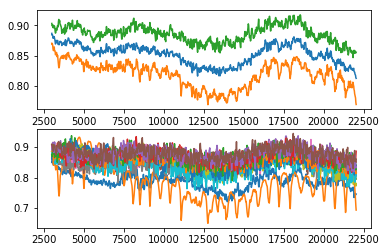

In [4]:
get_uncertainty(*samples["x-pad"])

### X-motion with fingernail

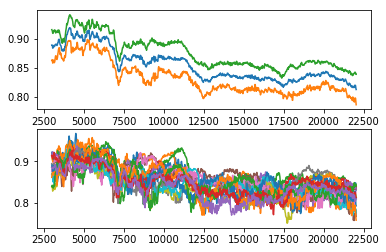

In [5]:
get_uncertainty(*samples["x-nail"])

### O-motion with finger pad

In [6]:
s

{'o-nail': ([3000,
   3019,
   3038,
   3057,
   3076,
   3095,
   3114,
   3133,
   3152,
   3171,
   3190,
   3209,
   3228,
   3247,
   3266,
   3285,
   3304,
   3323,
   3342,
   3361,
   3380,
   3399,
   3418,
   3437,
   3456,
   3475,
   3494,
   3513,
   3532,
   3551,
   3570,
   3589,
   3608,
   3627,
   3646,
   3665,
   3684,
   3703,
   3722,
   3741,
   3760,
   3779,
   3798,
   3817,
   3836,
   3855,
   3874,
   3893,
   3912,
   3931,
   3950,
   3969,
   3988,
   4007,
   4026,
   4045,
   4064,
   4083,
   4102,
   4121,
   4140,
   4159,
   4178,
   4197,
   4216,
   4235,
   4254,
   4273,
   4292,
   4311,
   4330,
   4349,
   4368,
   4387,
   4406,
   4425,
   4444,
   4463,
   4482,
   4501,
   4520,
   4539,
   4558,
   4577,
   4596,
   4615,
   4634,
   4653,
   4672,
   4691,
   4710,
   4729,
   4748,
   4767,
   4786,
   4805,
   4824,
   4843,
   4862,
   4881,
   4900,
   4919,
   4938,
   4957,
   4976,
   4995,
   5014,
   5033,
   5052,
   5071,


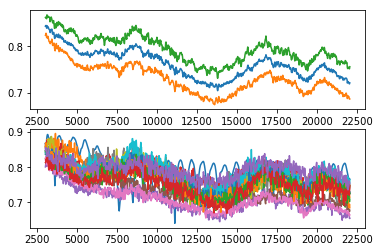

In [6]:
get_uncertainty(*samples["o-pad"])

### O-motion with fingernail

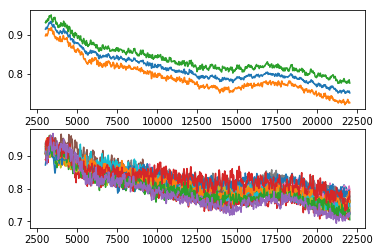

In [7]:
get_uncertainty(*samples["o-nail"])

### Swipe down, then back up with finger pad

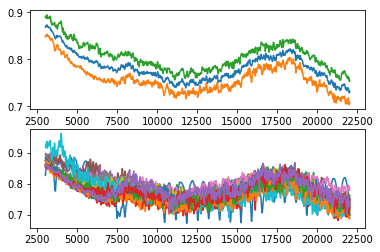

In [8]:
get_uncertainty(*samples["swipe_down-pad"])

### Swipe down, then back up with fingernail

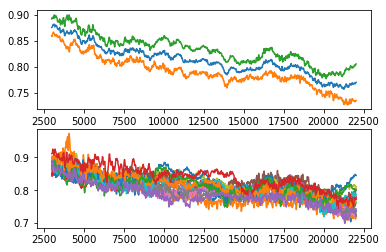

In [9]:
get_uncertainty(*samples["swipe_down-nail"])